In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue
import scipy.stats as stats
import math

In [2]:
n = 100
np.random.seed(25)
series = pd.Series(np.random.weibull(7,n), index=pd.date_range(start='1-1-2020', periods=n), name='main process')

In [3]:
pca = series.blue.ppa.process_capability(target=1, lsl=0.5, usl=1.25, subgroup_size=5)

In [4]:
pca.result

Process Data                       Potential Capability               Overall Capability                 
target         1                   Cp             0.92                Pp             0.89                
LSL            0.500000            Cpl            1.06                Ppl            1.03                
USL            1.250000            Cpu            0.78                Ppu            0.76                
mean           0.932190            Cpk            0.78                Ppk            0.76                
n              100                 CCpk           0.61                Cpm            0.54                
std within     0.135692            
std overall    0.139708            

Observed Performance               Expected Performance (Within)      Expected Performance (Overall)     
PPM < LSL      0                   PPM < LSL      724                 PPM < LSL      989                 
PPM > USL      10000               PPM > USL      724                 PPM > USL

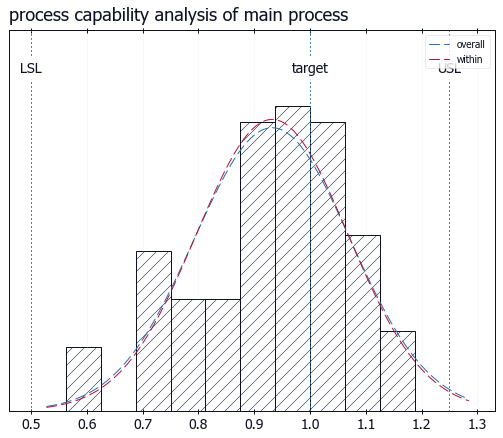

In [9]:
pca.plot()

In [10]:
test = 'testa'
result = f'{1.43453:1.2f}'
print(f'{test:{10}}{result:{15}}{test:{10}}{test:{10}}')

testa     1.43           testa     testa     


In [11]:
pca.pp

0.8947252065742642

In [12]:
pca.ccpk

0.6141347470064018

In [13]:
stats.norm.cdf(1, loc=0, scale=1)

0.8413447460685429

In [14]:
# PPM Total for expected "within" performance
(1 - stats.norm.cdf((pca.mean - pca._lsl) / pca.std_within, loc=0, scale=1)) + (1 - stats.norm.cdf((pca._usl - pca.mean) / pca.std_within, loc=0, scale=1))

0.010310333733401844

In [15]:
# PPM Total for expected "overall" performance
(1 - stats.norm.cdf((pca.mean - pca._lsl) / pca.std, loc=0, scale=1)) + (1 - stats.norm.cdf((pca._usl - pca.mean) / pca.std, loc=0, scale=1))

0.012447218976159413

In [16]:
pca.observed_performance

10000.0

In [17]:
pca.expected_performance_within

10310.333733401843

In [18]:
pca.expected_performance_overall

12447.218976159413

In [44]:
def round_sig(x, sig=6):
    return round(x, sig-int(math.floor(math.log10(abs(x))))-1)

In [45]:
round_sig(16123.123)

16123.1

In [5]:
def format_digits(x, digits=6):
    if isinstance(x, list):
        return max([format_digits(i) for i in x])
    elif x == 0 or not math.isfinite(x):
        return x
    else:
        prtd = max(digits, math.ceil(math.log10(abs(x))))
        prtd -= math.ceil(math.log10(abs(x)))
        prtd = min(digits, prtd)
        return f'1.{prtd}f'

In [8]:
format_digits([123.23, 1.2, 1.1231245])

'1.5f'